## Задание № 2

### Урок 2.  Масштабирование признаков. L1- и L2-регуляризация. Стохастический градиентный спуск

#### Задача № 1

Сгенерировать датасет при помощи sklearn.datasets.make_regression и
обучить линейную модель при помощи градиентного и стохастического градиентного спуска.
Нанести среднеквадратичную ошибку для обоих методов на один график,
сделать выводы о разнице скорости сходимости каждого из методов.


In [306]:
import numpy as np
import matplotlib.pyplot as plt

In [307]:
from sklearn import datasets

intercept = 20
n_samples = 100
X, y, coef = datasets.make_regression(n_samples=n_samples, n_features=1, coef=True,
                                      bias=intercept, noise=30,
                                      random_state=42)
coef

array(41.74110031)

> в X наблюдения располагаются в строках

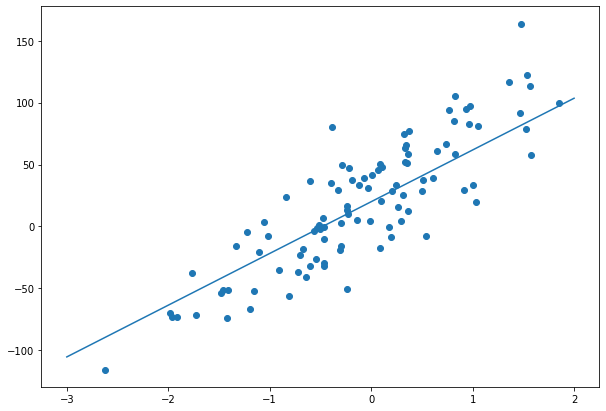

In [361]:
plt.figure(figsize=(10, 7))
plt.scatter(X, y)
l = coef.tolist()
x = np.array([-3, 2])
plt.plot(x, intercept + l * x)


> Представлена оригинальная функция и распределение точек

In [330]:
def calc_mse(y, y_pred, w=0, tetta=0):
    err = np.mean((y - y_pred) ** 2)
    return err

In [331]:
def eval_model(X, y, iterations, proc_loss, alpha=1e-4, tetta=0.1):
    Way = []
    Err = []
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        y_pred = np.dot(w, X.T)
        err = proc_loss(y, y_pred, w=w, tetta=tetta)
        w -= (alpha * (1 / n * 2 * np.dot((y_pred - y), X)))
        Way.append([i, w])
        Err.append([err])
    return Way, Err

In [332]:
w, err = eval_model(X, y, 500, calc_mse, alpha=1e-2)
w[-1][1], err[-1]
# (array([23.50675939, 49.81619045]), [730.628964658323])

(array([23.48643212, 49.81034661]), [702.4886065284207])

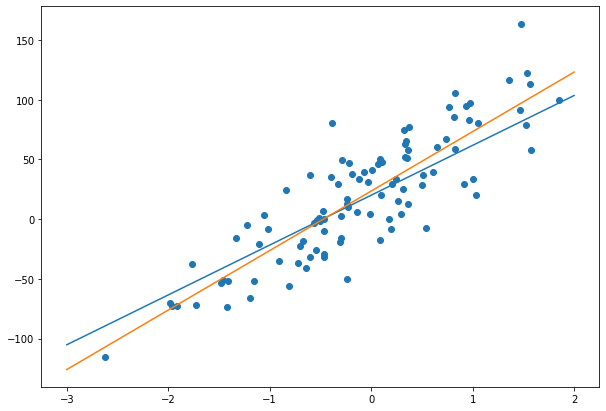

In [333]:
w_opt = w[-1][1]
plt.figure(figsize=(10, 7))
plt.scatter(X, y)
l = coef.tolist()
x = np.array([-3, 2])
plt.plot(x, intercept + l * x)
plt.plot(x, w_opt[0] + w_opt[1] * x)

> Восстановленная линейная зависимость

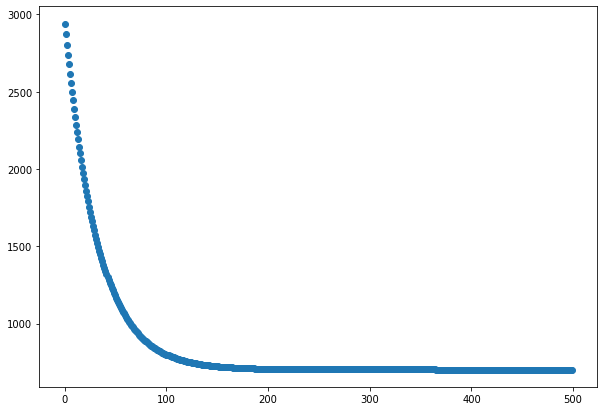

In [334]:
plt.figure(figsize=(10, 7))
plt.scatter(list(range(0, 500)), err)

> около 200 итерации оптимизация стабилизировалась

In [286]:
def eval_sgd_model(X, y, iterations, qty_in_batch=10, alpha=1e-4):
    Way = []
    Err = []
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    w = np.random.randn(X.shape[1])  #
    n = X.shape[0]  #
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    for i in range(1, iterations + 1):
        for b in range(n_batch):
            start_ = qty_in_batch * b
            end_ = qty_in_batch * (b + 1)

            # print(b, n_batch, start_, end_)

            X_tmp = X[start_: end_, :]
            y_tmp = y[start_: end_]
            y_pred_tmp = np.dot(w, X_tmp.T)  #
            err = calc_mse(y_tmp, y_pred_tmp)
            w -= (alpha * (1 / n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp)))
        Way.append([i, w])
        Err.append([err])
        if i % (iterations / 10) == 0:
            print(i, w, err)
    return Way, Err

In [287]:
w1, err1 = eval_sgd_model(X, y, iterations=500, qty_in_batch=10, alpha=1e-3)

50 [2.88266357 3.43578514] 430.2297454689491
100 [4.40358189 6.92200687] 448.80106385428
150 [ 5.81289037 10.14599516] 466.445346873373
200 [ 7.11871859 13.12750168] 483.17595582408444
250 [ 8.32861014 15.88478775] 499.01198430026807
300 [ 9.44956424 18.43473706] 513.9770361824795
350 [10.48807444 20.79295984] 528.0981848682019
400 [11.45016468 22.97388913] 541.405090740355
450 [12.34142274 24.99086971] 553.9292564436555
500 [13.16703145 26.85624037] 565.703401869144


In [288]:
w1[-1][1], err1[-1]

(array([13.16703145, 26.85624037]), [565.703401869144])

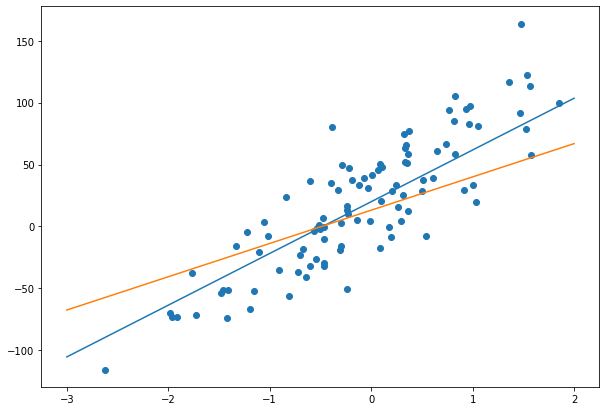

In [289]:
w_opt = w1[-1][1]
plt.figure(figsize=(10, 7))
plt.scatter(X, y)
l = coef.tolist()
x = np.array([-3, 2])
plt.plot(x, intercept + l * x)
plt.plot(x, w_opt[0] + w_opt[1] * x)

> Восстановленная линейная зависимость

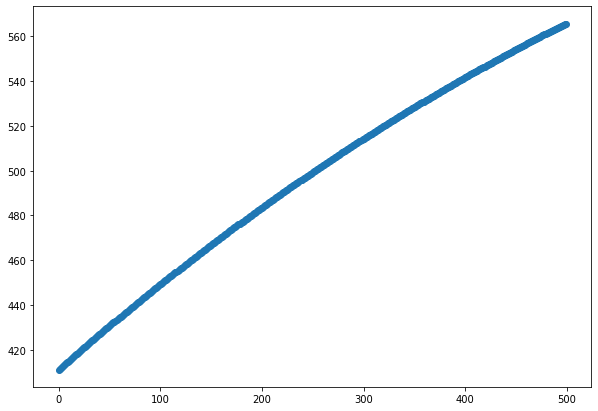

In [290]:
plt.figure(figsize=(10, 7))
plt.scatter(list(range(0, 500)), err1)

#### Задача № 2

Модифицировать решение первого задания путем добавления 𝐿2 -регуляризации
(в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

In [335]:
def reg_l2(y, y_pred, w, tetta=1e-3):
    norm = 0
    for w_i in w:
        norm += w_i ** 2
    err = np.mean((y - y_pred) ** 2) + tetta * norm
    return err

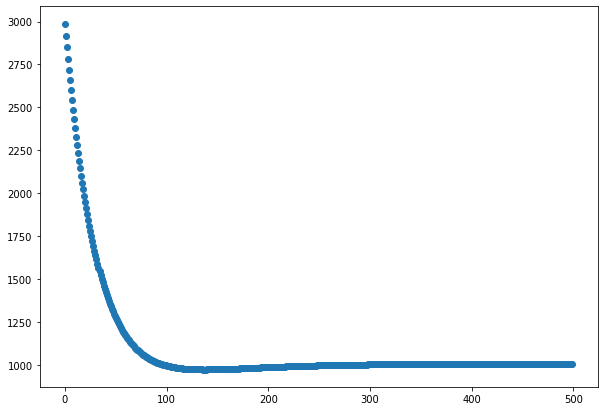

In [352]:
w, err = eval_model(X, y, 500, reg_l2, alpha=1e-2, tetta=.1)
plt.figure(figsize=(10, 7))
plt.scatter(list(range(0, 500)), err)

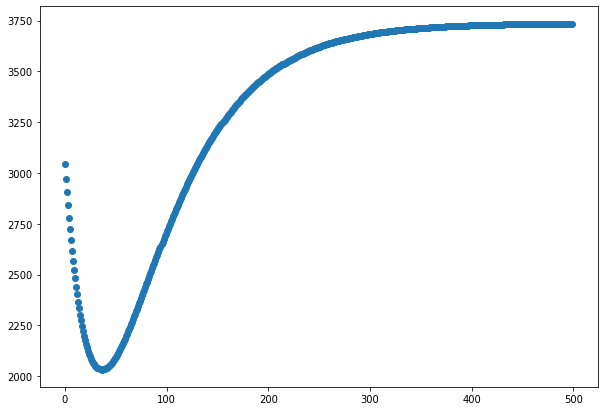

In [345]:
w, err = eval_model(X, y, 500, reg_l2, alpha=1e-2, tetta=1)
plt.figure(figsize=(10, 7))
plt.scatter(list(range(0, 500)), err)

> При коэффициенте регуляризации = 1 происходит мин ошибка уже на 50 итерации 


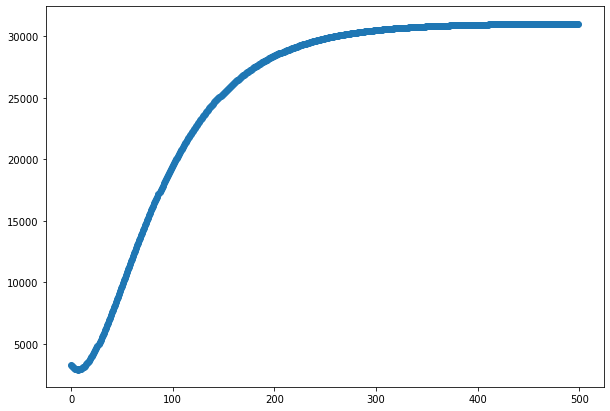

In [346]:
w, err = eval_model(X, y, 500, reg_l2, alpha=1e-2, tetta=10)
plt.figure(figsize=(10, 7))
plt.scatter(list(range(0, 500)), err)

#### Задача № 3 *

Модернизировать решение задания 2, заменив L2 регуляризацию на L1 регуляризацию.

In [353]:
def reg_l1(y, y_pred, w, tetta=1e-3):
    norm = 0
    for w_i in w:
        norm += abs(w_i)
    err = np.mean((y - y_pred) ** 2) + tetta * norm
    return err


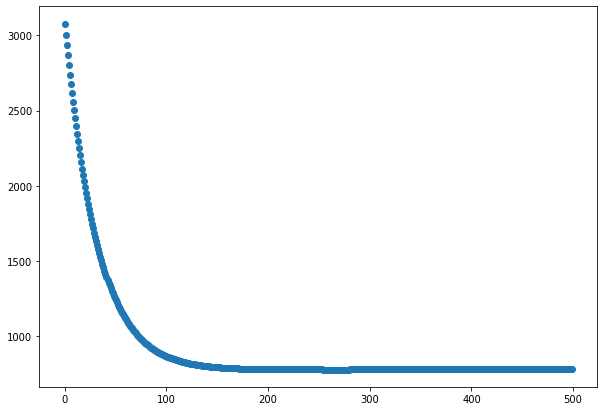

In [355]:
w, err = eval_model(X, y, 500, reg_l1, alpha=1e-2, tetta=1)
plt.figure(figsize=(10, 7))
plt.scatter(list(range(0, 500)), err)

In [ ]:
w, err = eval_model(X, y, 500, reg_l1, alpha=1e-2, tetta=10)
plt.figure(figsize=(10, 7))
plt.scatter(list(range(0, 500)), err)

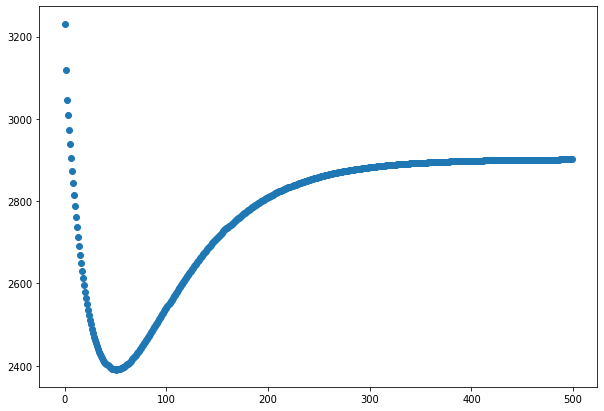

In [359]:
w, err = eval_model(X, y, 500, reg_l1, alpha=1e-2, tetta=30)
plt.figure(figsize=(10, 7))
plt.scatter(list(range(0, 500)), err)

